# Taller 1
Juan Sebastian Alvarez Eraso

Código: 201822427

## Inicio

Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.

In [1]:
# Setup
%cd /content/drive/MyDrive/Ciencia de datos aplicada/Taller 1/Dataset
NOMBRE_DEL_ARCHIVO = 'Data_Taller_1.csv'

import pandas as pd
import warnings

# Configuración de pandas para extender el número de filas y columnas en la visualización
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# Deshabilitar warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

/content/drive/MyDrive/Ciencia de datos aplicada/Taller 1/Dataset


In [2]:
# Se intenta obtener el dataset usando pandas

# Esta línea da un error:
# df = pd.read_csv(data = 'Data_Taller_1.csv', sep = ',')

Hay un error con el archivo y no es posible usar pandas directamente para obtener el dataset, no todas la líneas están bien. Hay unas líneas que tienen comillas dobles y los géneros no son únicos, hay que hacerle un tratamiento.

El error es:

```
TypeError Traceback (most recent call last) in 1 # Se intenta obtener el dataset usando pandas 2 ----> 3 df = pd.read_csv(data = 'Data_Taller_1.csv', sep = ',')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py in wrapper(args, **kwargs) 309 stacklevel=stacklevel, 310 ) --> 311 return func(args, **kwargs) 312 313 return wrapper

TypeError: read_csv() got an unexpected keyword argument 'data'
```

In [3]:
# A continuación se definen las funciones y métodos para leer línea a línea el archivo
# plano e ir creando el dataset

from csv import reader
from csv import DictReader
import array

# Una fila tiene varios géneros musicales si contiene comillas dobles y si la
# última comilla doble es el último caracter de la fila
def has_many_genres(row):
  if '"' in row:
    rindex = row.rindex('"');
    if rindex == len(row) - 2:
      return True
  return False

# Si el título de la canción tiene una coma en la mitad se cataloga como especial
def has_special_song_title(row):
  if ',"' in row:
    return True
  return False

# Si al final de la fila hay un punto y coma se retorna "True"
def genre_contains_special_character(row):
  if ';' in row[len(row)-1]:
    return True
  return False

def read_file(data):
  rows_with_errors = 0
  with open(NOMBRE_DEL_ARCHIVO, 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    # Validar si el header es nulo
    if header != None:
      # Iterar fila por fila
      for row in csv_reader:
        if has_many_genres(row[0]):
          index = row[0].rfind(',"');
          rindex = row[0].rindex('"');
          genre = row[0][index+2:rindex]
          genre = genre.replace(' ', '')
          genre = genre.replace(',', ' ')
          row[0] = row[0][:index] + ',' + genre
        else:
          # Cuando solo hay un género musical es necesario reemplazar el espacio
          # intermedio para que luego no se tome como si fueran 2 o más géneros
          row[len(row)-1] = row[len(row)-1].replace(' ', '')
        
        if has_special_song_title(row[0]):
          index = row[0].rfind(',"');
          rindex = row[0].rindex('"');
          song = row[0][index+2:rindex]
          song = song.replace(',', '')
          row[0] = row[0][:index] + ',' + song + row[0][rindex+1:]
        
        if len(row) == 1:
          row = row[0].split(',')
      
        if genre_contains_special_character(row):
          row[len(row)-1] = row[len(row)-1].replace(';', '')

        if len(row) == 18:
          data.append(row)
        else:
          # La fila se ignora por tener más de las 18 columnas
          rows_with_errors = rows_with_errors + 1
    
    print(f'Cantidad de filas ignoradas: {rows_with_errors}')
  
  return data

data = read_file([])

Cantidad de filas ignoradas: 1


In [4]:
columns = [
    'artist',
    'song',
    'duration_ms',
    'explicit',
    'year',
    'popularity',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'genre']

songs_df = pd.DataFrame(data, columns=columns)
songs_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3,1.77e-05,0.355,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.0,0.612,0.684,148.726,rock pop
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.029,0.173,0.0,0.251,0.278,136.859,pop country
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,1.35e-05,0.347,0.544,119.992,rock metal
4,*NSYNC,Bye Bye Bye,200560,False,2000,,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.00104,0.0845,0.879,172.656,pop


El dataset ya se encuentra generado, solo una fila fue ignorada por que tenía 19 columnas

In [5]:
# Cantidad de canciones en el dataset
songs_df.shape

(1999, 18)

In [6]:
# Ahora verificamos la cantidad de nulos que tenemos
songs_df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

No hay nulos, podemos continuar

In [7]:
# Verificamos el tipo de dato de cada serie
songs_df.dtypes

artist              object
song                object
duration_ms         object
explicit            object
year                object
popularity          object
danceability        object
energy              object
key                 object
loudness            object
mode                object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
genre               object
dtype: object

Todos los tipos de datos son "object", es necesario setear el tipo de dato correcto para cada serie.

Sin embargo, no es posible hacerlo de manera directa ya que aún hay valores con empty strings y es necesario saber que hacer con ellos, si eliminar esos registros o complementar su valor.

In [8]:
# Se verifica la cantidad de registros que tienen valores con empty strings
len(songs_df[(songs_df['artist'] == '') |
             (songs_df['song'] == '') |
             (songs_df['duration_ms'] == '') |
             (songs_df['explicit'] == '') |
             (songs_df['year'] == '') |
             (songs_df['popularity'] == '') |
             (songs_df['danceability'] == '') |
             (songs_df['energy'] == '') |
             (songs_df['key'] == '') |
             (songs_df['loudness'] == '') |
             (songs_df['mode'] == '') |
             (songs_df['speechiness'] == '') |
             (songs_df['acousticness'] == '') |
             (songs_df['instrumentalness'] == '') |
             (songs_df['liveness'] == '') |
             (songs_df['valence'] == '') |
             (songs_df['tempo'] == '') |
             (songs_df['genre'] == '')])

19

Solamente 19 registros tienen valores con campos vacíos, no representan una gran cantidad de información por lo que procedo a eliminarlos.

In [9]:
songs_df.drop(songs_df[(songs_df['artist'] == '') |
                       (songs_df['song'] == '') |
                       (songs_df['duration_ms'] == '') |
                       (songs_df['explicit'] == '') |
                       (songs_df['year'] == '') |
                       (songs_df['popularity'] == '') |
                       (songs_df['danceability'] == '') |
                       (songs_df['energy'] == '') |
                       (songs_df['key'] == '') |
                       (songs_df['loudness'] == '') |
                       (songs_df['mode'] == '') |
                       (songs_df['speechiness'] == '') |
                       (songs_df['acousticness'] == '') |
                       (songs_df['instrumentalness'] == '') |
                       (songs_df['liveness'] == '') |
                       (songs_df['valence'] == '') |
                       (songs_df['tempo'] == '') |
                       (songs_df['genre'] == '')].index, inplace=True)
songs_df.reset_index(inplace=True, drop=True)

In [10]:
# La cantidad de registros ha sido actualizada
songs_df.shape

(1980, 18)

In [11]:
# Transformamos la serie "explicit" en un valor numérico
def get_explicit_value(explicit):
  if explicit == 'True':
    return 1
  else:
    return 0

songs_df['explicit'] = songs_df['explicit'].apply(get_explicit_value)

In [12]:
# Ahora que ya tenemos todos nuestros registros con valores completos, no nulos ni vacíos
# podemos convertir los tipos de datos "object" en el correcto para cada serie
import numpy as np

songs_df = songs_df.astype({"duration_ms": np.int64,
                            "explicit": np.bool_,
                            "year": np.int64,
                            "popularity": np.int64,
                            "danceability": np.float64,
                            "energy": np.float64,
                            "key": np.int64,
                            "loudness": np.float64,
                            "mode": np.int64,
                            "speechiness": np.float64,
                            "acousticness": np.float64,
                            "instrumentalness": np.float64,
                            "liveness": np.float64,
                            "valence": np.float64,
                            "tempo": np.float64})

# Y ahora todas las columnas deberían tener el tipo de dato correcto
songs_df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [13]:
# Verifico la cantidad de canciones por año para ver si el dataset está balanceado
songs_per_year_df = songs_df.groupby(['year']).agg({'song': 'count'})
songs_per_year_df.reset_index(inplace=True)
songs_per_year_df.columns = ['year', 'songs']

songs_per_year_df

,year,songs
0,1998,1
1,1999,37
2,2000,72
3,2001,108
4,2002,89
5,2003,97
6,2004,94
7,2005,104
8,2006,95
9,2007,94


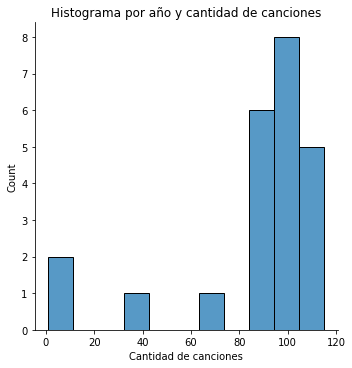

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(songs_per_year_df['songs'])
plt.xlabel('Cantidad de canciones')
plt.title('Histograma por año y cantidad de canciones')
plt.show()

Se observa que para los años 1998 y 2020 hay muy pocas canciones en comparación a los demás años, esto desbalancea nuestro dataset.

Por esa razon voy a eliminar las canciones de esos años.

In [15]:
songs_df.drop(songs_df[songs_df['year'].isin([1998, 2020])].index, inplace=True)
songs_df.reset_index(inplace=True, drop=True)

In [16]:
# La cantidad de registros ha sido actualizada
songs_df.shape

(1976, 18)

## Punto 1

¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

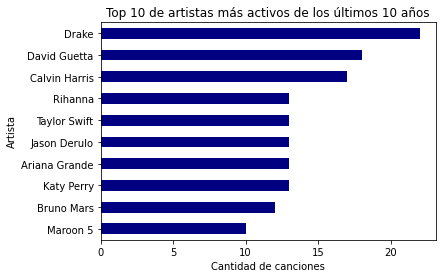

In [17]:
import matplotlib.pyplot as plt 

# Asumo que el último año es el máximo encontrado en el dataset, no puedo colocar el año 2022
# ya que el dataset solo tiene información hasta el año 2019
current_year = songs_df['year'].max()

most_active_artists = songs_df[songs_df['year'] > (current_year - 10)].groupby(['artist']).agg({'song': 'count'})
most_active_artists = most_active_artists.sort_values('song', ascending=False).head(10)
most_active_artists.sort_values('song', ascending=True, inplace=True)

most_active_artists['song'].plot(kind='barh', colormap='jet', title='Top 10 de artistas más activos de los últimos 10 años')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Artista')
plt.show()

## Punto 2

¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.

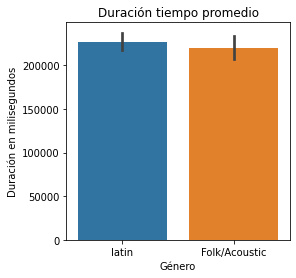

In [18]:
import seaborn as sns

# Voy a obtener en un nuevo dataset las canciones que son "latin" o "Folk/Acoustic"
latin_df = songs_df[songs_df['genre'].str.contains("latin")]
latin_df['genre'] = latin_df['genre'].apply(lambda x: 'latin')

folk_acustic_df = songs_df[songs_df['genre'].str.contains("Folk/Acoustic")]
folk_acustic_df.loc[folk_acustic_df['genre'] != '', 'genre'] = "Folk/Acoustic"

genre_df = pd.concat([latin_df, folk_acustic_df], axis=0)

plt.figure(figsize = (4,4))
ax = sns.barplot(x = genre_df['genre'], y = genre_df['duration_ms'], estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xlabel('Género')
ax.set_ylabel('Duración en milisegundos')
ax.set_title('Duración tiempo promedio')
plt.show()

En la gráfica podemos observar que no hay mucha diferencia entre la duración de las canciones género "latin" y las canciones con género "Folk/Acoustic".

Además, es posible observar en la mitad de cada barra una línea que indica la varianza entre los 2 géneros musicales y se observa también que no tienen mucha diferencia.

In [19]:
# Se encuentra la diferencia del tiempo promedio de ambos géneros
latin_duration_mean = genre_df[genre_df['genre'] == 'latin']['duration_ms'].mean()
folk_acustic_duration_mean = genre_df[genre_df['genre'] == 'Folk/Acoustic']['duration_ms'].mean()

print(f'Tiempo promedio de "latin" en milisegundos: {latin_duration_mean}')
print(f'Tiempo promedio de "Folk/Acoustic" en milisegundos: {folk_acustic_duration_mean}')

diff_ms = latin_duration_mean - folk_acustic_duration_mean
diff_s = diff_ms / 1000
diff_m = diff_s / 60

print('')
print(f'Diferencia del tiempo promedio en milisegundos: {diff_ms}')
print(f'Diferencia del tiempo promedio en segundos: {diff_s}')
print(f'Diferencia del tiempo promedio en minutos: {diff_m}')

Tiempo promedio de "latin" en milisegundos: 226784.38709677418
Tiempo promedio de "Folk/Acoustic" en milisegundos: 220183.65

Diferencia del tiempo promedio en milisegundos: 6600.737096774188
Diferencia del tiempo promedio en segundos: 6.600737096774188
Diferencia del tiempo promedio en minutos: 0.11001228494623647


La diferencia es de solo 6,6 segundos, no es muy alto y eso se evidencia también en la gráfica anterior.

## Punto 3

Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015 y 2019?

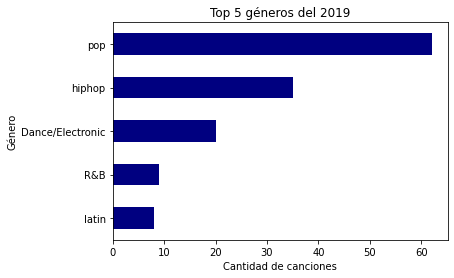

In [20]:
# Hago una copia del dataframe original para poder aplicar "explode" y tener los
# géneros separados por filas
exploded_songs_df = songs_df.copy()
exploded_songs_df['genre'] = exploded_songs_df['genre'].str.split(' ', expand = False)

exploded_songs_df = exploded_songs_df.explode('genre')
exploded_songs_df.reset_index(inplace=True)

# Luego encuentro el top 5 de los géneros del 2019
top_genre_df = exploded_songs_df[exploded_songs_df['year'] == 2019].groupby(['genre']).agg({'song': 'count'})
top_genre_df = top_genre_df.sort_values('song', ascending=False).head(5)
top_genre_df = top_genre_df.sort_values('song', ascending=True)

top_genre_df['song'].plot(kind='barh', colormap='jet', title='Top 5 géneros del 2019')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Género')
plt.show()

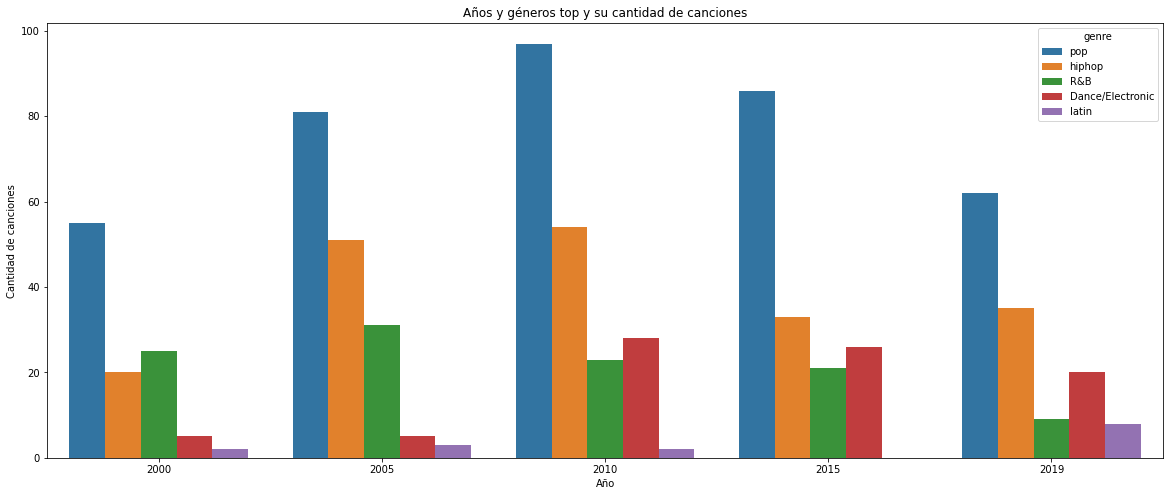

In [36]:
# Y ahora obtengo las canciones de los años 2000, 2005, 2010, 2015 y 2019 que
# tengan el top de géneros encontrado previamente
top_genre_df_tmp = top_genre_df.reset_index()
top_genre_df_tmp.columns = ['genre', 'count']
top_genre = np.array(top_genre_df_tmp['genre'])

years = [2000, 2005, 2010, 2015, 2019]

years_exploded_songs_df = exploded_songs_df[(exploded_songs_df['year'].isin(years)) & (exploded_songs_df['genre'].isin(top_genre))]

plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'year', data = years_exploded_songs_df, hue='genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Años y géneros top y su cantidad de canciones')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de canciones')
plt.show()

En general se puede observar que la cantidad de canciones del top 5 tuvo un crecimiento hasta el año 2010, y desde ese año hasta el año 2019 hubo un decrecimiento.

Por el contrario, el género "latin" no presenta el mismo comportamiento y al contrario de tener un decrecimiento ha tenido un crecimiento en el último año. No es un crecimiento considerable de todas formas.

## Punto 4

¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

In [22]:
# Necesito encontrar un dataset que contenga el nombre de cada uno de los artistas,
# su año debut y la media de su popularidad en ese año. Se hace lo mismo para el año
# siguiente al de su debut
artist_progression = songs_df.groupby(['artist']).agg({'year': 'min'})
artist_progression.reset_index(inplace=True)
artist_progression.columns = ['artist', 'debut_year']

def get_popularity_mean(artist, year):
  return songs_df[(songs_df['artist'] == artist) & (songs_df['year'] == year)]['popularity'].mean()

artist_progression['debut_year_popularity_mean'] = artist_progression.apply(lambda x: get_popularity_mean(x.artist, x.debut_year), axis=1)
artist_progression['next_year'] = artist_progression['debut_year'].apply(lambda x: x + 1)
artist_progression['next_year_popularity_mean'] = artist_progression.apply(lambda x: get_popularity_mean(x.artist, x.next_year), axis=1)

# Completo la popularidad promedio de los registros donde la popularidad es nula
artist_progression.fillna(value={'debut_year_popularity_mean': 0.0,
                                 'next_year_popularity_mean': 0.0}, inplace=True)

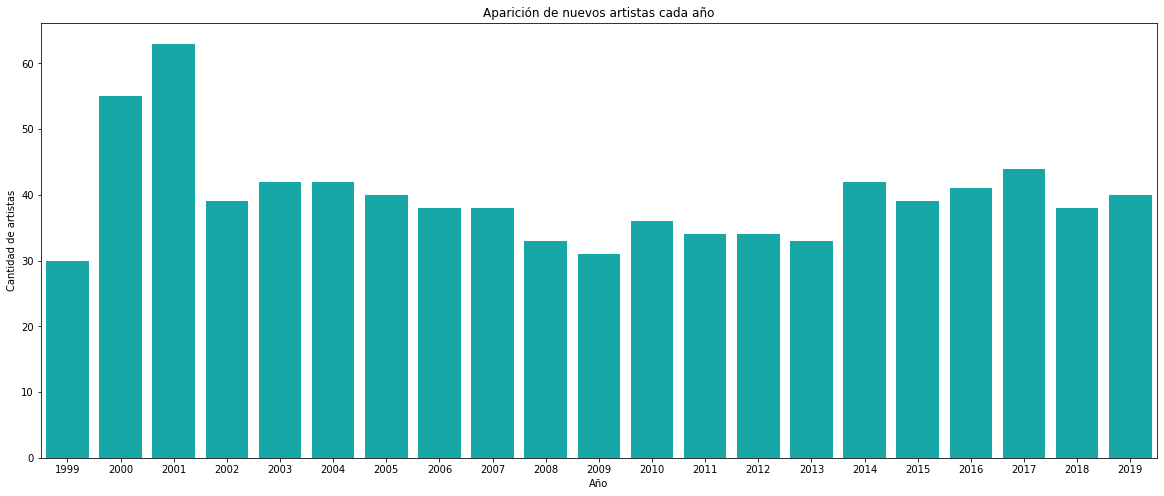

In [23]:
# Se grafica la aparición de nuevos artistas cada año
plt.figure(figsize = (20,8))
ax = sns.countplot(x = 'debut_year', data = artist_progression, color='c')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_title('Aparición de nuevos artistas cada año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de artistas')
plt.show()

Se puede ver que en promedio hay entre 30 y 40 artistas cada año. Solo en los años 2000 y 2001 hubo un boom de nuevos artistas (Entre 55 y 65 aprox.)

In [24]:
# Luego, calculo la progresión de cada artista haciendo una diferencia entre su popularidad
# media del año del debut vs popularidad media del año siguiente.
# No la calculo en términos porcentuales ya que la escala de popularidad está de 0 a 100.
def get_progression(debut_year_popularity_mean, next_year_popularity_mean):
  return next_year_popularity_mean - debut_year_popularity_mean

artist_progression['progression'] = artist_progression.apply(lambda x: get_progression(x.debut_year_popularity_mean, x.next_year_popularity_mean), axis=1)

top_artist_progression = artist_progression.sort_values('progression', ascending=False).head(10)

# Esta es la tabla de los artistas con MAYOR progresión
top_artist_progression

,artist,debut_year,debut_year_popularity_mean,next_year,next_year_popularity_mean,progression
12,A Boogie Wit da Hoodie,2017,0.0,2018,74.000000,74.000000
128,Camila Cabello,2017,1.0,2018,74.000000,73.000000
30,Alessia Cara,2015,0.0,2016,71.000000,71.000000
147,Cheat Codes,2016,0.0,2017,68.000000,68.000000
438,Liam Payne,2017,1.0,2018,62.000000,61.000000
750,The Wanted,2010,18.0,2011,77.000000,59.000000
353,Jax Jones,2016,1.0,2017,58.000000,57.000000
818,ZAYN,2016,29.5,2017,77.000000,47.500000
223,Duke Dumont,2013,27.0,2014,67.000000,40.000000
577,One Direction,2012,41.0,2013,74.333333,33.333333


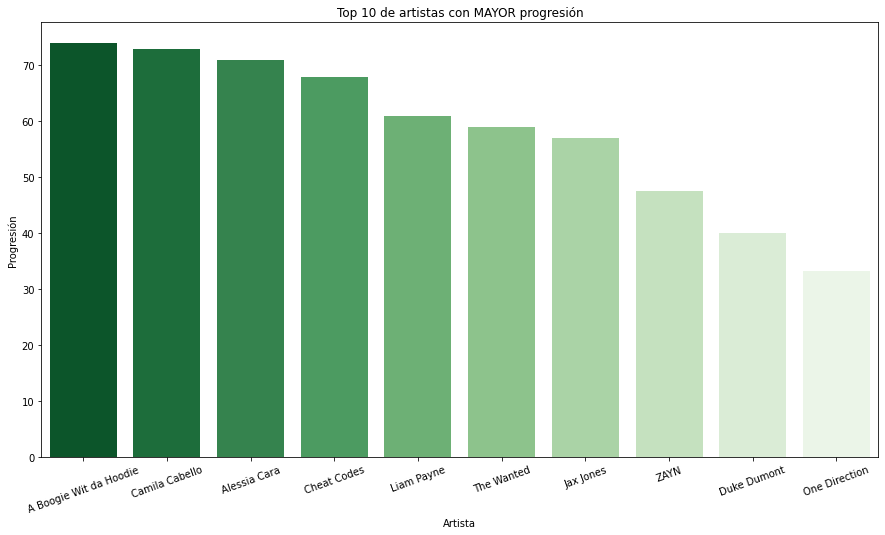

In [25]:
# Gráfica de los artistas con MAYOR progresión
plt.figure(figsize = (15,8))
ax = sns.barplot(top_artist_progression['artist'], top_artist_progression['progression'], palette='Greens_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
plt.title('Top 10 de artistas con MAYOR progresión')
plt.xlabel('Artista')
plt.ylabel('Progresión')
plt.show()

Se podría decir que los artistas con mayor progresión son artistas jóvenes, entre los 17 y 25 años.

## Punto 5

Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

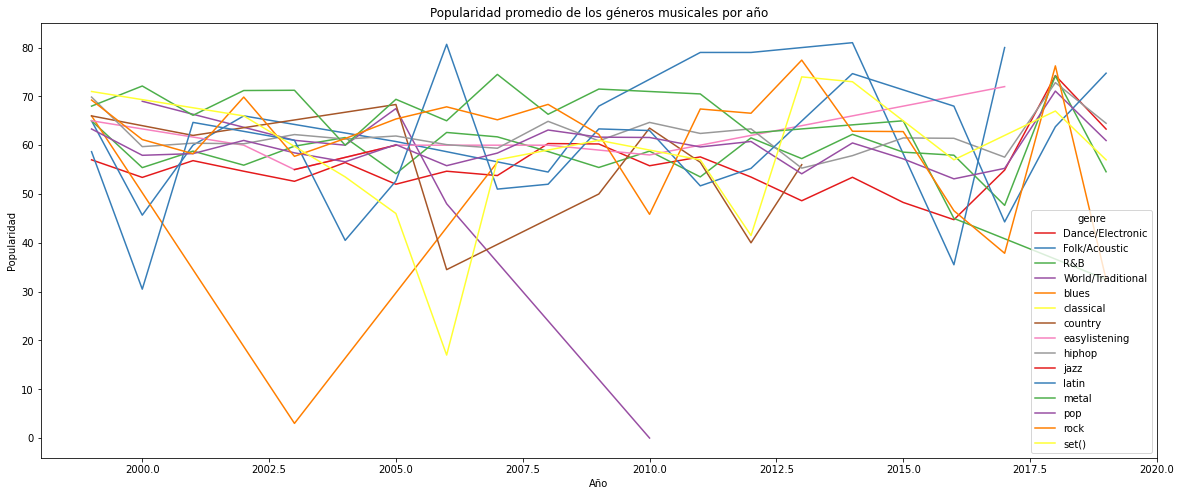

In [26]:
# Creo un dataset agrupado por género y por año que contenga la media de la popularidad
# y la media de "explicit" (Me va a servir más adelante para el punto 7)
genre_by_year_df = exploded_songs_df.groupby(['genre', 'year']).agg({'popularity': 'mean', 'explicit': 'mean'})
genre_by_year_df.reset_index(inplace=True)
genre_by_year_df.columns = ['genre', 'year', 'popularity', 'explicit']

plt.figure(figsize = (20,8))
ax = sns.lineplot(x='year', y='popularity', hue='genre', data=genre_by_year_df, palette = 'Set1')
plt.title('Popularidad promedio de los géneros musicales por año')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()

Es complejo entender la gráfica ya que al existir varios géneros musicales las líneas de tendencia se solapan.

Por lo que he decidido darles una clasificación adicional en cuanto al género musical para poder visualizar mejor la gráfica.

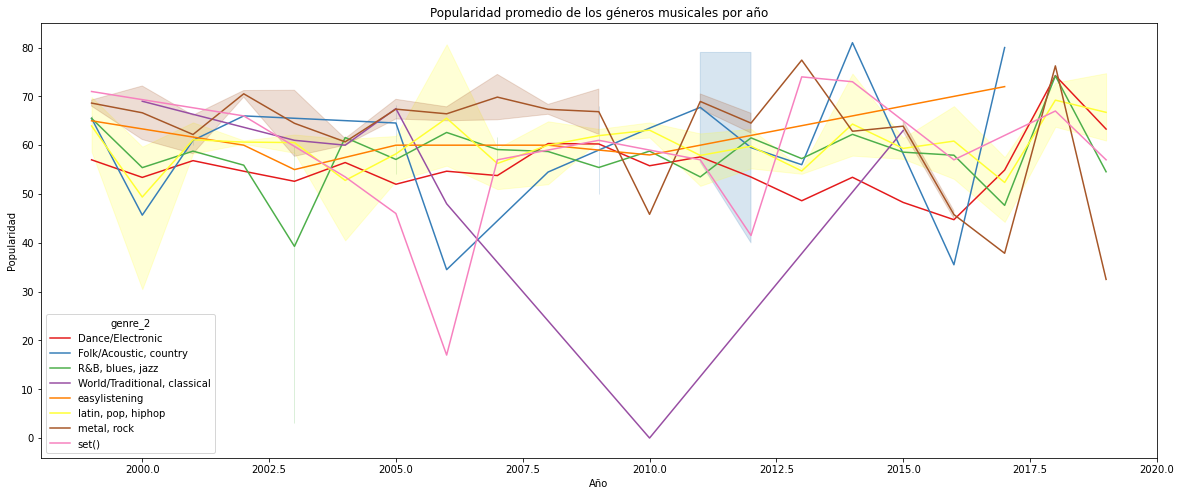

In [27]:
def get_genre_2(genre):
  if (genre == 'R&B') | (genre == 'blues') | (genre == 'jazz'):
    return 'R&B, blues, jazz'
  elif (genre == 'World/Traditional') | (genre == 'classical'):
    return 'World/Traditional, classical'
  elif (genre == 'latin') | (genre == 'pop') | (genre == 'hiphop'):
    return 'latin, pop, hiphop'
  elif (genre == 'metal') | (genre == 'rock'):
    return 'metal, rock'
  elif (genre == 'Folk/Acoustic') | (genre == 'country'):
    return 'Folk/Acoustic, country'
  else:
    return genre

genre_by_year_df['genre_2'] = genre_by_year_df['genre'].apply(get_genre_2)

plt.figure(figsize = (20,8))
ax = sns.lineplot(x='year', y='popularity', hue='genre_2', data=genre_by_year_df, palette = 'Set1')
plt.title('Popularidad promedio de los géneros musicales por año')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()

Conclusiones:
1. La gráfica es más clara al agrupar géneros musicales conocidos.
2. Hay una tendencia clara en el año 2010 por los géneros clásicos y tradicionales donde se presentó una fuerte caida en la popularidad. Sin embargo en el año 2015 repuntó nuevamente.
3. No hay un género musical con popularidad del 100% ni cercana tampoco. El género que más se le acerca es el folk o country. Esto nos hace ver la diversidad de culturas y gustos.
4. Se podría decir que la popularidad promedio de los géneros musicales (Exceptuando los picos bajos de "set()" y "World/Traditional, classical") está entre 50 y 70 puntos.
5. La tendencia es estable entre los años 2000 y 2010. Después del 2010 y hasta el año 2020 la tendencia cambia; la popularidad promedio varía bastante.


## Punto 6

Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.

In [28]:
# Se obtiene un dataset específico con solo la información de "pop" y "rock"
pop_and_rock_df = exploded_songs_df[exploded_songs_df['genre'].isin(['rock', 'pop'])]

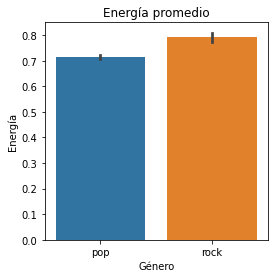

In [29]:
# Visualizamos su energía promedio y su varianza
plt.figure(figsize = (4,4))
ax = sns.barplot(x = pop_and_rock_df['genre'], y = pop_and_rock_df['energy'], estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xlabel('Género')
ax.set_ylabel('Energía')
ax.set_title('Energía promedio')
plt.show()

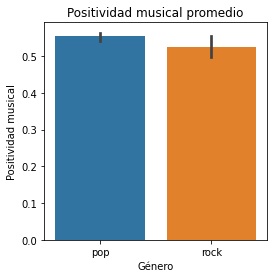

In [30]:
# Visualizamos su valence promedio y su varianza
plt.figure(figsize = (4,4))
ax = sns.barplot(x = pop_and_rock_df['genre'], y = pop_and_rock_df['valence'], estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xlabel('Género')
ax.set_ylabel('Positividad musical')
ax.set_title('Positividad musical promedio')
plt.show()

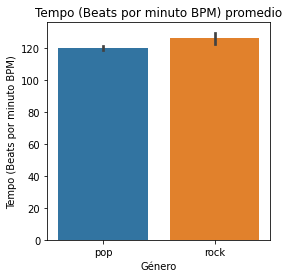

In [31]:
# Visualizamos su tempo promedio y su varianza
plt.figure(figsize = (4,4))
ax = sns.barplot(x = pop_and_rock_df['genre'], y = pop_and_rock_df['tempo'], estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
ax.set_xlabel('Género')
ax.set_ylabel('Tempo (Beats por minuto BPM)')
ax.set_title('Tempo (Beats por minuto BPM) promedio')
plt.show()

In [32]:
# Correlación de las variables
pop_and_rock_df[['energy', 'valence', 'tempo']].corr()

,energy,valence,tempo
energy,1.000000,0.336981,0.154707
valence,0.336981,1.000000,-0.021614
tempo,0.154707,-0.021614,1.000000


Conclusiones:
1. Un género que tenga alta su *energía* promedio y alto su *tempo* promedio no está correlacionado. En la gráfica "Energía promedio" se puede observar que el "rock" es el género que en la percepción tiene mayor intensidad y actividad que el "pop", y ¿ el *tempo* debería ser mayor igualmente? (A mayor energía -> mayor tempo). Sin embargo, cuando se grafica la correlación de las variables, se puede ver que la correlación "*energy* - *tempo*" es solo del 0.15.
2. El "rock" y el "pop" son géneros no muy positivos, su valence está en promedio por el 0.5. Se puede ver también que en la gráfica "Tempo (Beats por minuto BPM) promedio" son géneros con un alto valor, pero eso no significa que por ir más rápido son canciones más **positivas**.


## Punto 7

Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

¿Qué se evidencia con el paso del tiempo y el contenido explícito en las canciones?

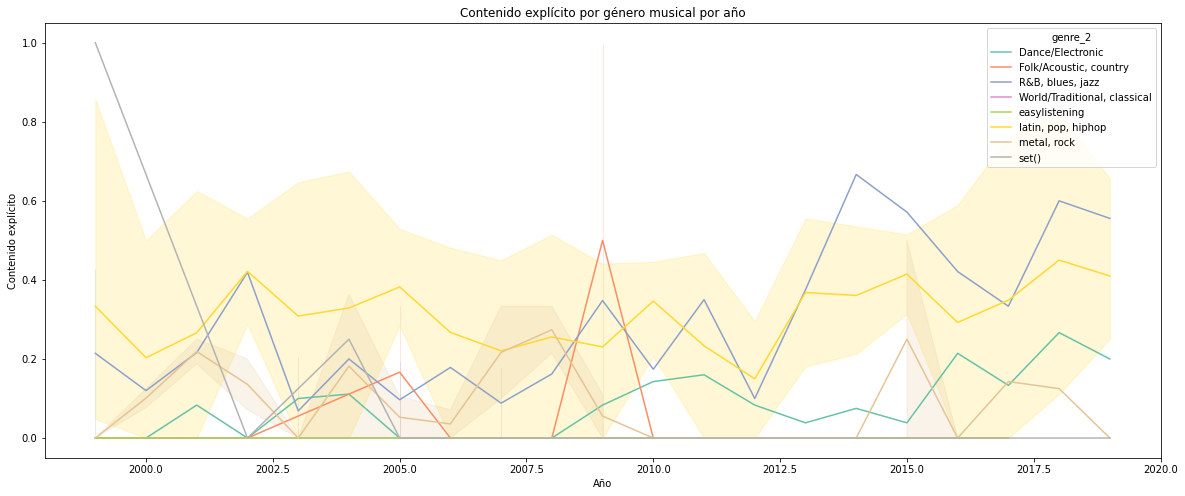

In [37]:
# Con el dataset creado en el punto 5 se puede obtener la gráfica
plt.figure(figsize = (20,8))
ax = sns.lineplot(x='year', y='explicit', hue='genre_2', data=genre_by_year_df, palette = 'Set2')
plt.title('Contenido explícito por género musical por año')
plt.xlabel('Año')
plt.ylabel('Contenido explícito')
plt.show()

Se puede observar que hay una leve alza del contenido explícito desde el año 2015 hasta el año 2020. Vamos a comprobarlo también dejando de hacer la segmentación por género musical

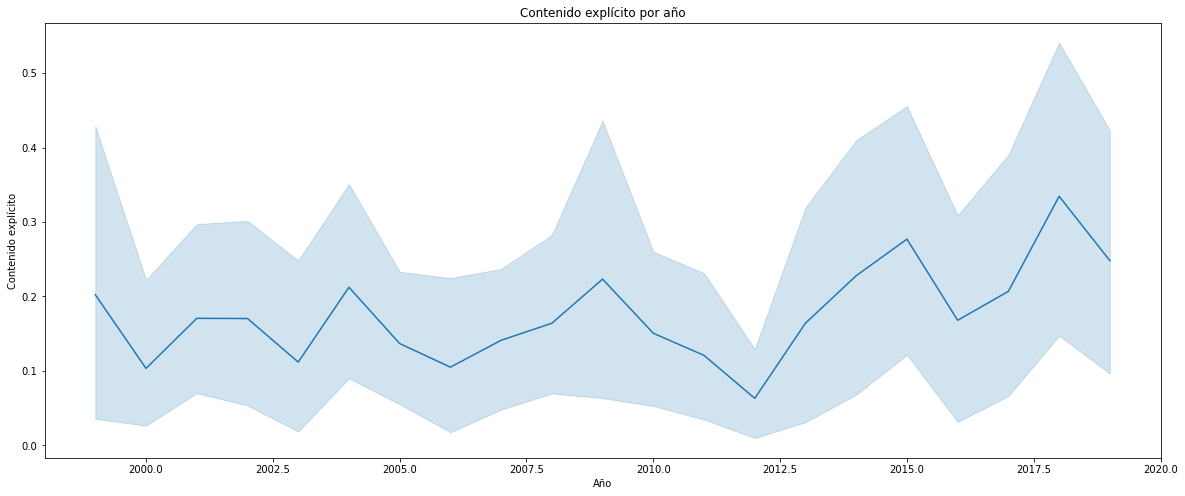

In [38]:
# Se grafica la misma información pero sin la segmentación por género
plt.figure(figsize = (20,8))
ax = sns.lineplot(x='year', y='explicit', data=genre_by_year_df, palette = 'Set2')
plt.title('Contenido explícito por año')
plt.xlabel('Año')
plt.ylabel('Contenido explícito')
plt.show()

Aquí se puede ver más claro, el contenido explícito por año viene aumentando conforme pasa el tiempo.

Esto quiere decir que a los artistas ya no les preocupa ser juzgados por lo que dicen (Violencia, sexo, problemas, etc).

In [39]:
# Se encuentra la correlación entre el año, la popularidad y el contenido explícito desde el año 2015
songs_df[songs_df['year'] >= 2015][['year', 'popularity', 'explicit']].corr()

,year,popularity,explicit
year,1.000000,0.145774,0.108843
popularity,0.145774,1.000000,0.097419
explicit,0.108843,0.097419,1.000000


Y aunque la gráfica nos indique que en los últimos años el contenido explícito viene en aumento, la tabla de correlación nos indica que no hay relación entre el paso del tiempo, la popularidad y el contenido explícito.

Esto quiere decir que no tiene nada (o poco) que ver que una canción sea popular, el contenido explícito dentro de la canción no interfiere mucho.